In [ ]:

import numpy as np
from pricing import BlackScholesPricer, TrinomialTree, Market, Option

S0 = 100
K = 100
T=5    
r=0.05
sigma=0.2
N = 4



trinom = TrinomialTree(Market(S0, r, sigma), Option(K, 'callx', T), N).price_option()
# import matplotlib.pyplot as plt

# bs_convergence = BlackScholesPricer().price(S=S0, K=K, T=T, r=r, q=0, sigma=sigma, option_type='put') # q=0 car pas de dividendes



In [8]:
trinom

(np.float64(137.74767014485602), np.float64(0.0))

In [ ]:
STs = [np.array([S0])] # un seul noeud en racine

for _ in range(N):
    prev_nodes = STs[-1]
    up_node = prev_nodes * alpha
    mid_node = prev_nodes * np.exp(r * delta_t)
    down_node = prev_nodes / alpha

    # Dynamically calculate the required lengths
    num_up = len(up_node) - 1 if len(up_node) > 1 else 1
    num_down = len(down_node) - 1 if len(down_node) > 1 else 1

    # Create new_node with appropriate lengths
    new_node = np.empty(num_up + len(mid_node) + num_down)
    new_node[:num_up] = up_node[:num_up]
    new_node[num_up:num_up + len(mid_node)] = mid_node
    new_node[num_up + len(mid_node):] = down_node[-num_down:]

    STs.append(new_node)

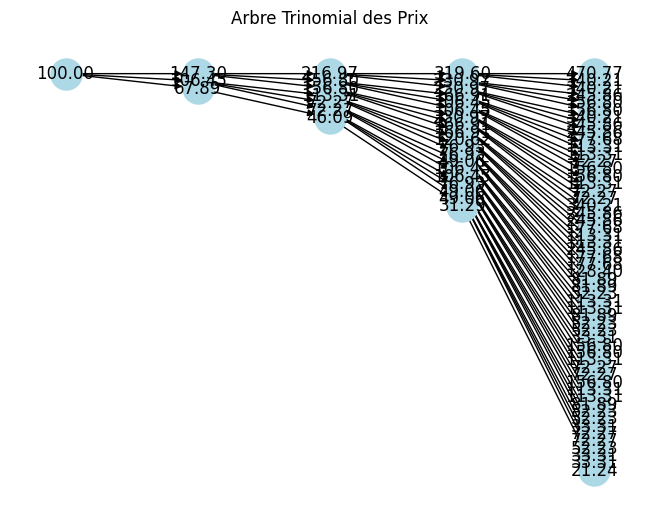

In [6]:
TrinomialTree(S0, r, sigma, T, N, K).display_tree(STs)

In [11]:
prices = [p for p in trinom[-1] if isinstance(p, (int, float))]  # Extract numerical prices from the last level of the tree

In [13]:
np.mean(prices)

np.float64(62.62137047890027)

In [18]:
bs_convergence

np.float64(4.494184322585749)